<a href="https://colab.research.google.com/github/palmmywatch/data_science_bootcamp07/blob/main/Data_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Transformation

**An exercise from the book R for Data Science is the source of this project.**

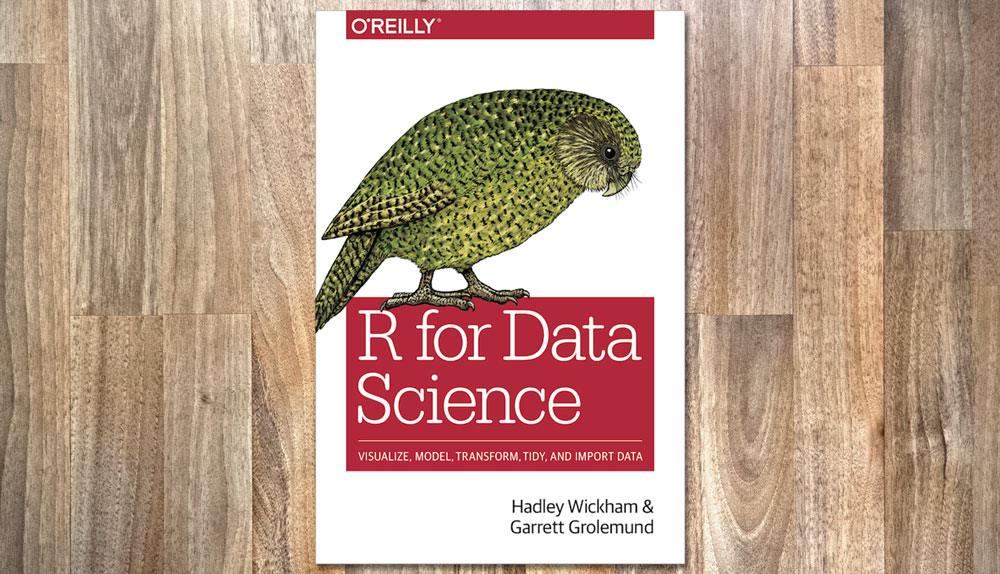

## Data Dictionary

- `year, month, day` Date of departure.

- `dep_time, arr_time` Actual departure and arrival times (format HHMM or HMM), local tz.

- `sched_dep_time, sched_arr_time` Scheduled departure and arrival times (format HHMM or HMM),
local tz.

- `dep_delay, arr_delay` Departure and arrival delays, in minutes. Negative times represent early
departures/arrivals.

- `carrier` Two letter carrier abbreviation.

- `flight` Flight number.

- `tailnum` Plane tail number.

- `origin, dest` Origin and destination.

- `air_time` Amount of time spent in the air, in minutes.

- `distance` Distance between airports, in miles.

- `hour, minute` Time of scheduled departure broken into hour and minutes.

- `time_hour` Scheduled date and hour of the flight as a POSIXct date.

## Library

In [ ]:
# install package
install.packages("nycflights13")
install.packages("tidyverse")

# load library
library(nycflights13)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts

## nycflight13

I’ll use nycflights13::flights. This data frame contains all 336,776 flights that departed from New York City in 2013. The data comes from the US Bureau of Transportation Statistics, and is documented in ?flights.

In [ ]:
nycflights13::flights %>%
  glimpse()

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

**Summary Data**

In [ ]:
summary(flights)

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

## Filter rows with `filter()`

**Find all flights that**

1. Had an arrival delay of two or more hours



In [ ]:
flights %>% 
  select(flight, arr_delay) %>% 
  filter(arr_delay >= 120)

flight,arr_delay
<int>,<dbl>
4576,137
3944,851
856,123
1086,145
4497,127
525,125
4181,136
5712,123
4092,123


2. Flew to Houston (`IAH` or `HOU`)

In [ ]:
flights %>% 
  select(flight, dest) %>% 
  filter(dest %in% c("IAH", "HOU"))

flight,dest
<int>,<chr>
1545,IAH
1714,IAH
496,IAH
473,IAH
1479,IAH
1220,IAH
1004,IAH
455,IAH
1086,IAH


3. Were operated by United, American, or Delta

In [ ]:
flights %>% 
  select(flight, carrier) %>% 
  filter(carrier %in% c("AA", "UA", "DL"))

flight,carrier
<int>,<chr>
1545,UA
1714,UA
1141,AA
461,DL
1696,UA
301,AA
194,UA
1124,UA
707,AA


4. Departed in summer (July, August, and September)

In [ ]:
flights %>% 
  filter(month %in% c(7, 8, 9))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,1,1,2029,212,236,2359,157,B6,915,N653JB,JFK,SFO,315,2586,20,29,2013-07-01 20:00:00
2013,7,1,2,2359,3,344,344,0,B6,1503,N805JB,JFK,SJU,200,1598,23,59,2013-07-01 23:00:00
2013,7,1,29,2245,104,151,1,110,B6,234,N348JB,JFK,BTV,66,266,22,45,2013-07-01 22:00:00
2013,7,1,43,2130,193,322,14,188,B6,1371,N794JB,LGA,FLL,143,1076,21,30,2013-07-01 21:00:00
2013,7,1,44,2150,174,300,100,120,AA,185,N324AA,JFK,LAX,297,2475,21,50,2013-07-01 21:00:00
2013,7,1,46,2051,235,304,2358,186,B6,165,N640JB,JFK,PDX,304,2454,20,51,2013-07-01 20:00:00
2013,7,1,48,2001,287,308,2305,243,VX,415,N627VA,JFK,LAX,298,2475,20,1,2013-07-01 20:00:00
2013,7,1,58,2155,183,335,43,172,B6,425,N535JB,JFK,TPA,140,1005,21,55,2013-07-01 21:00:00
2013,7,1,100,2146,194,327,30,177,B6,1183,N531JB,JFK,MCO,126,944,21,46,2013-07-01 21:00:00


5. Arrived more than two hours late, but didn’t leave late

In [ ]:
flights %>% 
  filter(month %in% c(7, 8, 9))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,1,1,2029,212,236,2359,157,B6,915,N653JB,JFK,SFO,315,2586,20,29,2013-07-01 20:00:00
2013,7,1,2,2359,3,344,344,0,B6,1503,N805JB,JFK,SJU,200,1598,23,59,2013-07-01 23:00:00
2013,7,1,29,2245,104,151,1,110,B6,234,N348JB,JFK,BTV,66,266,22,45,2013-07-01 22:00:00
2013,7,1,43,2130,193,322,14,188,B6,1371,N794JB,LGA,FLL,143,1076,21,30,2013-07-01 21:00:00
2013,7,1,44,2150,174,300,100,120,AA,185,N324AA,JFK,LAX,297,2475,21,50,2013-07-01 21:00:00
2013,7,1,46,2051,235,304,2358,186,B6,165,N640JB,JFK,PDX,304,2454,20,51,2013-07-01 20:00:00
2013,7,1,48,2001,287,308,2305,243,VX,415,N627VA,JFK,LAX,298,2475,20,1,2013-07-01 20:00:00
2013,7,1,58,2155,183,335,43,172,B6,425,N535JB,JFK,TPA,140,1005,21,55,2013-07-01 21:00:00
2013,7,1,100,2146,194,327,30,177,B6,1183,N531JB,JFK,MCO,126,944,21,46,2013-07-01 21:00:00


6. Were delayed by at least an hour, but made up over 30 minutes in flight

In [ ]:
flights %>% 
  filter(arr_delay >= 60 & dep_delay - arr_delay > 30)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,2205,1720,285,46,2040,246,AA,1999,N5DNAA,EWR,MIA,146,1085,17,20,2013-01-01 17:00:00
2013,1,1,2326,2130,116,131,18,73,B6,199,N594JB,JFK,LAS,290,2248,21,30,2013-01-01 21:00:00
2013,1,3,1503,1221,162,1803,1555,128,UA,551,N835UA,EWR,SFO,320,2565,12,21,2013-01-03 12:00:00
2013,1,3,1839,1700,99,2056,1950,66,AA,575,N631AA,JFK,EGE,239,1747,17,0,2013-01-03 17:00:00
2013,1,3,1941,1759,102,2246,2139,67,UA,979,N402UA,EWR,PHX,274,2133,17,59,2013-01-03 17:00:00
2013,1,3,2257,2000,177,45,2224,141,9E,3439,N931XJ,JFK,CVG,90,589,20,0,2013-01-03 20:00:00
2013,1,4,1917,1700,137,2135,1950,105,AA,575,N5EUAA,JFK,EGE,239,1747,17,0,2013-01-04 17:00:00
2013,1,4,2010,1745,145,2257,2120,97,AA,177,N332AA,JFK,SFO,327,2586,17,45,2013-01-04 17:00:00
2013,1,4,2058,1730,208,2,2110,172,B6,179,N523JB,JFK,PHX,285,2153,17,30,2013-01-04 17:00:00


7. Departed between midnight and 6am (inclusive)

In [ ]:
flights %>% 
  filter(dep_time >= 0, dep_time <= 600)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


## Arrange rows with `arrange()`

1. `dep_time` column: sort all missing values to the start

In [ ]:
flights %>%
  arrange(desc(is.na(dep_time)), dep_time)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00
2013,1,1,NA,1500,NA,NA,1825,NA,AA,1925,N3EVAA,LGA,MIA,NA,1096,15,0,2013-01-01 15:00:00
2013,1,1,NA,600,NA,NA,901,NA,B6,125,N618JB,JFK,FLL,NA,1069,6,0,2013-01-01 06:00:00
2013,1,2,NA,1540,NA,NA,1747,NA,EV,4352,N10575,EWR,CVG,NA,569,15,40,2013-01-02 15:00:00
2013,1,2,NA,1620,NA,NA,1746,NA,EV,4406,N13949,EWR,PIT,NA,319,16,20,2013-01-02 16:00:00
2013,1,2,NA,1355,NA,NA,1459,NA,EV,4434,N10575,EWR,MHT,NA,209,13,55,2013-01-02 13:00:00
2013,1,2,NA,1420,NA,NA,1644,NA,EV,4935,N759EV,EWR,ATL,NA,746,14,20,2013-01-02 14:00:00
2013,1,2,NA,1321,NA,NA,1536,NA,EV,3849,N13550,EWR,IND,NA,645,13,21,2013-01-02 13:00:00


2. Sort `flights` to find the most delayed flights. Find the flights that left earliest.

In [ ]:
flights %>%
  arrange(desc(dep_delay)) %>%
  head(10)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00


In [ ]:
flights %>%
  arrange(dep_delay) %>%
  head(10)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,7,2040,2123,-43,40,2352,48,B6,97,N592JB,JFK,DEN,265,1626,21,23,2013-12-07 21:00:00
2013,2,3,2022,2055,-33,2240,2338,-58,DL,1715,N612DL,LGA,MSY,162,1183,20,55,2013-02-03 20:00:00
2013,11,10,1408,1440,-32,1549,1559,-10,EV,5713,N825AS,LGA,IAD,52,229,14,40,2013-11-10 14:00:00
2013,1,11,1900,1930,-30,2233,2243,-10,DL,1435,N934DL,LGA,TPA,139,1010,19,30,2013-01-11 19:00:00
2013,1,29,1703,1730,-27,1947,1957,-10,F9,837,N208FR,LGA,DEN,250,1620,17,30,2013-01-29 17:00:00
2013,8,9,729,755,-26,1002,955,7,MQ,3478,N711MQ,LGA,DTW,88,502,7,55,2013-08-09 07:00:00
2013,10,23,1907,1932,-25,2143,2143,0,EV,4361,N13994,EWR,TYS,111,631,19,32,2013-10-23 19:00:00
2013,3,30,2030,2055,-25,2213,2250,-37,MQ,4573,N725MQ,LGA,DTW,87,502,20,55,2013-03-30 20:00:00
2013,3,2,1431,1455,-24,1601,1631,-30,9E,3318,N929XJ,JFK,BUF,55,301,14,55,2013-03-02 14:00:00


3. Sort `flights` to find the fastest (highest speed) flights.

In [ ]:
flights %>%
  arrange(desc(distance /air_time)) %>%
  head(10)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,5,25,1709,1700,9,1923,1937,-14,DL,1499,N666DN,LGA,ATL,65,762,17,0,2013-05-25 17:00:00
2013,7,2,1558,1513,45,1745,1719,26,EV,4667,N17196,EWR,MSP,93,1008,15,13,2013-07-02 15:00:00
2013,5,13,2040,2025,15,2225,2226,-1,EV,4292,N14568,EWR,GSP,55,594,20,25,2013-05-13 20:00:00
2013,3,23,1914,1910,4,2045,2043,2,EV,3805,N12567,EWR,BNA,70,748,19,10,2013-03-23 19:00:00
2013,1,12,1559,1600,-1,1849,1917,-28,DL,1902,N956DL,LGA,PBI,105,1035,16,0,2013-01-12 16:00:00
2013,11,17,650,655,-5,1059,1150,-51,DL,315,N3768,JFK,SJU,170,1598,6,55,2013-11-17 06:00:00
2013,2,21,2355,2358,-3,412,438,-26,B6,707,N779JB,JFK,SJU,172,1598,23,58,2013-02-21 23:00:00
2013,11,17,759,800,-1,1212,1255,-43,AA,936,N5FFAA,JFK,STT,175,1623,8,0,2013-11-17 08:00:00
2013,11,16,2003,1925,38,17,36,-19,DL,347,N3773D,JFK,SJU,173,1598,19,25,2013-11-16 19:00:00


## Select column with `select()`

1. select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

In [ ]:
flights %>%
  select(dep_time, dep_delay, arr_time, arr_delay) %>%
  head()

dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
517,2,830,11
533,4,850,20
542,2,923,33
544,-1,1004,-18
554,-6,812,-25
554,-4,740,12


2. `any_of()` function and conjunction with vector

In [ ]:
vars <- c("year", "month", "day", "dep_delay", "arr_delay")

flights %>%
  select(any_of(vars)) %>%
  head()

year,month,day,dep_delay,arr_delay
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,2,11
2013,1,1,4,20
2013,1,1,2,33
2013,1,1,-1,-18
2013,1,1,-6,-25
2013,1,1,-4,12


3. Does the result of running the following code surprise you? How do the select helpers deal with case by default? How can you change that default?

In [ ]:
flights %>%
  select(contains("TIME")) %>%
  head()

dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,time_hour
<int>,<int>,<int>,<int>,<dbl>,<dttm>
517,515,830,819,227,2013-01-01 05:00:00
533,529,850,830,227,2013-01-01 05:00:00
542,540,923,850,160,2013-01-01 05:00:00
544,545,1004,1022,183,2013-01-01 05:00:00
554,600,812,837,116,2013-01-01 06:00:00
554,558,740,728,150,2013-01-01 05:00:00


In [ ]:
flights %>%
  select(contains("TIME", ignore.case = FALSE)) %>%
  head()

1
2
3
4
5
6

## Add new variables with `mutate()`

Convert `dep_time` and `sched_dep_time` to a more convenient representation of number of minutes since midnight.

- Manual Calculation

In [ ]:
# mutate
flights_min <- flights %>%
  mutate(
    dep_time_min = ( (dep_time %/% 100 * 60) + (dep_time %% 100) ) %% (60*24),
    sched_dep_time_min = ( (sched_dep_time %/% 100 * 60) + (sched_dep_time %% 100) ) %% (24*60)
  )

In [ ]:
# view
flights_min %>%
  select(dep_time, dep_time_min,
         sched_dep_time, sched_dep_time_min) %>%
  head()

dep_time,dep_time_min,sched_dep_time,sched_dep_time_min
<int>,<dbl>,<int>,<dbl>
517,317,515,315
533,333,529,329
542,342,540,340
544,344,545,345
554,354,600,360
554,354,558,358


- Create `time_to_min` function

In [ ]:
# create function
time_to_min <- function(var) {
  ( (var %/% 100 * 60) + (var %% 100) ) %% (24*60)
}

In [ ]:
# mutate
flights_min2 <- flights %>%
  mutate(
    dep_time_min2 = time_to_min(dep_time),
    sched_dep_time_min2 = time_to_min(sched_dep_time)
  )

In [ ]:
# view
flights_min2 %>%
  select(dep_time, dep_time_min2,
         sched_dep_time, sched_dep_time_min2) %>%
  head()

dep_time,dep_time_min2,sched_dep_time,sched_dep_time_min2
<int>,<dbl>,<int>,<dbl>
517,317,515,315
533,333,529,329
542,342,540,340
544,344,545,345
554,354,600,360
554,354,558,358


## Grouped summaries with `summarise()`

1. Come up with another approach that will give you the same output as `not_cancelled %>% count(dest)` and `not_cancelled %>% count(tailnum, wt = distance)`.

In [ ]:
not_cancelled <- flights %>%
  filter(!is.na(dep_delay), !is.na(arr_delay))

- Output from question

In [ ]:
not_cancelled %>%
  count(dest) %>%
  head()

dest,n
<chr>,<int>
ABQ,254
ACK,264
ALB,418
ANC,8
ATL,16837
AUS,2411


In [ ]:
not_cancelled %>%
  count(tailnum, wt = distance) %>%
  head()

tailnum,n
<chr>,<dbl>
D942DN,3418
N0EGMQ,239143
N10156,109664
N102UW,25722
N103US,24619
N104UW,24616


- Another approach

In [ ]:
# not_cancelled %>% count(dest)
not_cancelled %>%
  group_by(dest) %>%
  summarise(n = n()) %>%
  head()

dest,n
<chr>,<int>
ABQ,254
ACK,264
ALB,418
ANC,8
ATL,16837
AUS,2411


In [ ]:
# not_cancelled %>% count(tailnum, wt = distance)
not_cancelled %>%
  group_by(tailnum) %>%
  summarise(n = sum(distance)) %>%
  head()

tailnum,n
<chr>,<dbl>
D942DN,3418
N0EGMQ,239143
N10156,109664
N102UW,25722
N103US,24619
N104UW,24616


## Grouped mutates (and filters)

1. Which plane (`tailnum`) has the worst on-time record?

In [ ]:
flights_tailnum <- flights %>%
  filter(!is.na(arr_delay)) %>%
  group_by(tailnum) %>%
  summarise(arr_delay = mean(arr_delay),
            n = n()) %>%
  arrange(desc(n))

In [ ]:
flights_tailnum %>%
  head(5)

tailnum,arr_delay,n
<chr>,<dbl>,<int>
N725MQ,4.672794,544
N722MQ,4.911340,485
N723MQ,6.416842,475
N711MQ,6.290043,462
N713MQ,6.817372,449


2. What time of day should you fly if you want to avoid delays as much as possible?

In [ ]:
flights %>%
  group_by(hour) %>%
  summarise(arr_delay_mean = mean(arr_delay, na.rm = TRUE)) %>%
  arrange(arr_delay_mean) %>%
  head()

hour,arr_delay_mean
<dbl>,<dbl>
7,-5.3044716
5,-4.7969072
6,-3.3844854
9,-1.4514074
8,-1.1132266
10,0.9539401
